# Kernel SVM Classification

In [7]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
#importing dataset
dataset=pd.read_csv('./../0. DataSets/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Business Problem explanation:

In [9]:
#we have a list of users with some variables. UserID (that we are not going to use), Gender, Age and Estimated Salary
#we have the info if these users bought or not our product
#We want to build a model that imputing the same variables predicts if that user is likely to buy our product or not

In [10]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [11]:
#Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

/home/xbuns/anaconda3/envs/my_env_1/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
#fitting Kernel SVM to the training set.
#Kernel SVM transforms the data into a higher dimension so we can make these new points linearly separable (by a line or a hyper plane)
#A unica diferenca para o SVM foi dentro do classifier no SVC, pomos outro kernel

from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
#Predicting the Test set results
y_pred=classifier.predict(X_test)

In [14]:
#Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true=y_test,y_pred=y_pred)

In [15]:
cm

#the diagonals are the correct predictions (64, 29)
#3 and 4 are the number of incorrect predictions that our model made

array([[64,  4],
       [ 3, 29]])

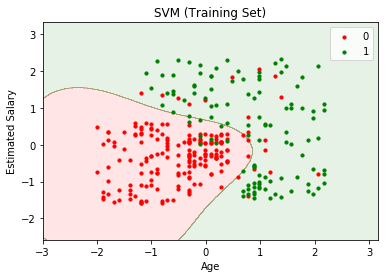

In [16]:
#Visualising the training set results
#Aqui tenho um quadrado dividido em verde e vermelho. Verde e a area que o meu classifier predicts que os users vao comprar
#Vermelho area que o classifier acha que o user nao vai comprar
#Os pontos sao o meu training set.
#Estao coloridos consoante esse user comprou (verde), ou nao comprou (vermelho)
#Se um ponto estiver na area verde mas estiver pintado a vermelho quer dizer que o classifier errou
#A confusion matrix acima diz isso mesmo (para o test set): quantos pontos estao na regiao verde e sao verdes =29, quantos estao na verde e sao vermelhors =3

from matplotlib.colors import ListedColormap
X_set, y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
alpha=0.1,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j,s=10)
plt.title("SVM (Training Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

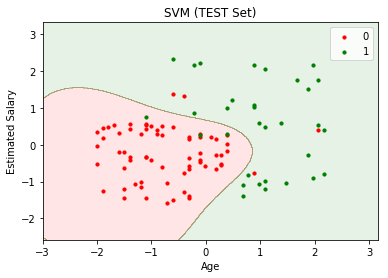

In [17]:
#Visualising the TEST set results
from matplotlib.colors import ListedColormap
X_set, y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
alpha=0.1,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j,s=10)
plt.title("SVM (TEST Set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()